# Quest

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [28]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [19]:
X_radius = X[:, 0].reshape(-1,1)
y = (y==0).astype(np.int)

model = LogisticRegression().fit(X_radius,y)
y_pred = model.predict(X_radius)
y_score = model.decision_function(X_radius)  # decision_function(): 판별함수 값 계산
# f_value(계산된 판별함수 값)가 양수이면 y=1, 음수이면 y=0으로 분류

# 데이터프레임 형태로 확인해 보자
df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,
                  columns=["y_score", "y_pred", "y"])
df = df.sort_values("y_score", ascending=False).reset_index(drop=True)
display(df.head(), df.tail())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,y_score,y_pred,y
0,0.065552,1.0,1.0
1,0.064690,1.0,0.0
2,0.064304,1.0,1.0
3,0.063595,1.0,0.0
4,0.058922,1.0,1.0


,y_score,y_pred,y
495,-0.042917,0.0,1.0
496,-0.043056,0.0,1.0
497,-0.043391,0.0,1.0
498,-0.049437,0.0,1.0
499,-0.064653,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


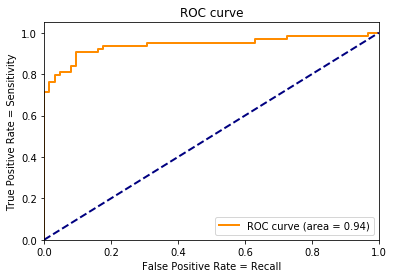

In [29]:
X_radius, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X_radius, y)

# model = LogisticRegression()

y_score = model.fit(X_train, y_train).decision_function(X_test)

# decision_function()을 사용할 수 없는 모델의 경우 y_score 대신 predict_proba()로 확률값을 구해줌
# probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
# probs = probs[:, 1] # 0,1 중 1로 분류될 확률

# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

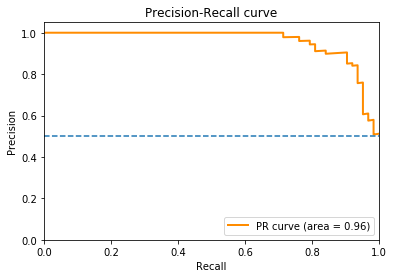

In [30]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# calculate precision-recall AUC
pr_auc = auc(recall, precision)

plt.plot(recall, precision, lw=2, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

In [31]:
X_texture = X[:, 1].reshape(-1,1)
y = (y==0).astype(np.int)

model = LogisticRegression().fit(X_texture,y)
y_pred = model.predict(X_texture)
y_score = model.decision_function(X_texture)  # decision_function(): 판별함수 값 계산
# f_value(계산된 판별함수 값)가 양수이면 y=1, 음수이면 y=0으로 분류

# 데이터프레임 형태로 확인해 보자
df = pd.DataFrame(np.vstack([y_score, y_pred, y]).T,
                  columns=["y_score", "y_pred", "y"])
df = df.sort_values("y_score", ascending=False).reset_index(drop=True)
display(df.head(), df.tail())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,y_score,y_pred,y
0,0.101859,1.0,0.0
1,0.099811,1.0,0.0
2,0.095207,1.0,0.0
3,0.083410,1.0,1.0
4,0.083254,1.0,0.0


,y_score,y_pred,y
495,-0.062514,0.0,0.0
496,-0.065608,0.0,0.0
497,-0.065886,0.0,0.0
498,-0.067913,0.0,1.0
499,-0.071190,0.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


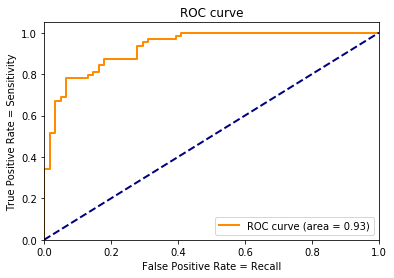

In [32]:
X_texture, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X_texture, y)

# model = LogisticRegression()

y_score = model.fit(X_train, y_train).decision_function(X_test)

# decision_function()을 사용할 수 없는 모델의 경우 y_score 대신 predict_proba()로 확률값을 구해줌
# probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
# probs = probs[:, 1] # 0,1 중 1로 분류될 확률

# calculate AUC
roc_auc = roc_auc_score(y_test, y_score)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

plt.figure()
plt.plot(fpr, tpr, lw=2, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate = Recall')
plt.ylabel('True Positive Rate = Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

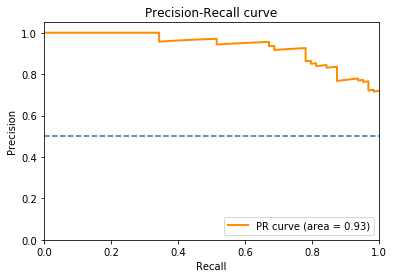

In [33]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# calculate precision-recall AUC
pr_auc = auc(recall, precision)

plt.plot(recall, precision, lw=2, color='darkorange', label='PR curve (area = %0.2f)' % pr_auc)
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.show()

X_radius의 ROC와 PR 곡선 모두의 AUC가 더 크기 때문에 X_radius 변수로 진행

In [36]:
# kFold 모듈
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X_radius):
    print(X_radius[train_index], y[test_index])
# cv.split(X)는 X를 k-fold로 나눈 뒤 각 fold에서의 (train_index, test_index)를 반환하는 iterable

[[-0.86266862  2.14904512]
 [-1.8205195  -0.9030943 ]
 [ 1.41936704 -0.24455319]
 [-1.86183739  2.96704985]
 [ 1.66092503  0.96720405]
 [-1.28453543  1.98958597]
 [-1.24759975  1.12367226]
 [-1.30627462 -0.32504772]
 [ 0.09802247 -0.64145802]
 [-0.39412245 -1.26007135]
 [ 0.78611278 -1.88135471]
 [-0.72978164 -1.44794489]
 [-2.36670004 -0.19764923]
 [-0.534835   -0.10105528]
 [ 0.92793282  1.52648521]
 [-0.9425004   2.05044745]
 [-1.02554633  0.87225561]
 [ 0.97952441  1.87400244]
 [-1.16529067 -0.17413538]
 [ 1.37676562  2.04215624]
 [ 1.81746406  2.02181999]
 [-1.10495632  0.28005564]
 [ 3.38648649 -0.53925042]
 [-0.61871724  1.68071304]
 [-1.27004724 -0.87886232]
 [ 3.73528294 -0.33673204]
 [-2.27965075 -0.96385325]
 [ 1.93096784  1.90360954]
 [-1.37469774 -1.77407381]
 [-0.36207718  0.49723392]
 [ 0.30808335  1.26666864]
 [-1.41288652 -1.01216887]
 [ 0.93866683  0.14818816]
 [ 1.65012229  1.53251271]
 [ 2.08185268 -1.10905831]
 [-0.28537624  1.02494082]
 [-1.30814383 -3.34227308]
 

In [37]:
# cross_val_score 모듈
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0) # target이 골고루 분포되도록 shuffle 옵션
scores = cross_val_score(LogisticRegression(), X_radius, y, cv=kfold)
# cross_val_score(모델, 데이터, 타깃)
scores # 각 fold에 대한 score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.48, 0.45, 0.5 , 0.43, 0.43])

In [38]:
scores = cross_val_score(LogisticRegression(), X_radius, y) 
scores 
# cross_val_score의 기본값은 k=3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0.45508982, 0.49700599, 0.48192771])

In [39]:
scores = cross_val_score(LogisticRegression(), X_radius, y, cv=5)
scores
# cross_val_score는 기본적으로 분류 모델에 대해 StratifiedKfold 사용

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.48514851, 0.47      , 0.46      , 0.43      , 0.46464646])

In [40]:
display(scores.mean(), scores.var()) # 교차검증 점수들의 평균과 분산 확인

0.4619589958995899

0.0003269698216546326

In [41]:
# 딕셔너리 형태로 시험할 파라미터를 지정
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}
# 로지스틱 회귀의 경우 주요 파라미터: C, penalty 등
# 이 경우 파라미터'C'값 6개, 'penalty'값 2개의 조합 => 총 6x2=12번 모델 돌리게 됨

In [43]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5) # 보통 교차검증을 사용한 그리드 서치를 시행!
# GridSearchCV(모델, 파라미터 딕셔너리)
grid_search.fit(X_radius, y)

print('최적의 파라미터: ', grid_search.best_params_)
print('최고 성능 모델: ', grid_search.best_estimator_)
print('최고 교차검증 점수: {:.2f}'.format(grid_search.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

최적의 파라미터:  {'C': 0.001, 'penalty': 'l1'}
최고 성능 모델:  LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
최고 교차검증 점수: 0.50


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# 데이터프레임으로 교차검증 결과 확인해보자 (grid_search.cv_results_)
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행 출력
display(np.transpose(results.head()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

,0,1,2,3,4
mean_fit_time,0.00855665,0.00359054,0.0155786,0.00529737,0.137902
std_fit_time,0.000812895,0.000479859,0.00228574,0.000894883,0.0602524
mean_score_time,0.000408268,0.00019083,0.00019908,0.000198364,0.000559711
std_score_time,0.000481532,0.00038166,0.000398159,0.000396729,0.00047493
param_C,0.001,0.001,0.01,0.01,0.1
param_penalty,l1,l2,l1,l2,l1
params,"{'C': 0.001, 'penalty': 'l1'}","{'C': 0.001, 'penalty': 'l2'}","{'C': 0.01, 'penalty': 'l1'}","{'C': 0.01, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}"
split0_test_score,0.878261,0.913043,0.895652,0.904348,0.904348
split1_test_score,0.930435,0.921739,0.930435,0.93913,0.93913
split2_test_score,0.929204,0.911504,0.911504,0.929204,0.929204
